In [27]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [53]:
nx = 41
L = 2.0

dx = L / (nx-1)

nu = 0.3

sigma = 0.6

dt = sigma * dx**2 / nu
nt = 20

x=numpy.linspace(0.0,L,nx)

In [54]:
u0 = numpy.ones(nx)
mask = numpy.where ( (x>=0.5)&(x<=1))
u0 [mask] = 2.0

In [55]:
u = u0.copy()
for n in range(nt):
    un = u.copy()
    for i in range(1,nx - 1):
        u [i] = un[i]  + sigma * (un[i-1] - 2 * un[i] + un[i+1])
    u[0] = 1.0
    u[-1] = 1.0
u_naive = u

In [56]:
u = u0.copy()
for n in range(nt):
        un = u.copy()
        u[1:-1] = un[1:-1] + sigma * (un[:-2] - 2*un[1:-1] + un[2:])

In [57]:
numpy.allclose(u_naive, u)

True

In [58]:
def diffusion ( u0, sigma = 0.6, nt = 20):
    u_hist = [u0.copy()]
    for n in range(nt):
        un = u.copy()
        u[1:-1] = un[1:-1] + sigma * (un[:-2] - 2*un[1:-1] + un[2:])
        u_hist.append(u.copy())
    return u_hist

In [59]:
u_hist = diffusion (u0, sigma = sigma, nt = nt)

In [60]:
len(u_hist)

21

In [61]:
def plot_solution (n, u_hist, x):
    pyplot.figure()
    pyplot.xlabel('x')
    pyplot.ylabel('y')
    pyplot.grid()
    pyplot.plot(x, u_hist[0], label = "Initial")
    pyplot.plot(x, u_hist[n], label = "Current")
    pyplot.legend()
    pyplot.xlim(0,2) ; pyplot.ylim (0.5, 2.5)
    pyplot.show()

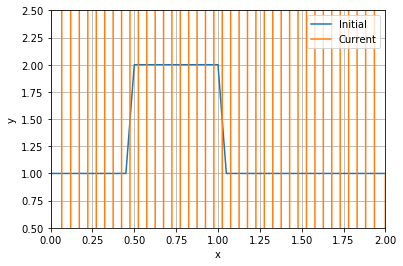

In [62]:
plot_solution(-1,u_hist,x)

In [63]:
import ipywidgets

In [64]:
nt_slider = ipywidgets.IntSlider (value = 0, min = 0, max = nt, step = 1,
                                  description = 'Time step')
w = ipywidgets.interactive(plot_solution, n = nt_slider, u_hist = ipywidgets.fixed(u_hist), x = ipywidgets.fixed(x) )

In [65]:
w

interactive(children=(IntSlider(value=0, description='Time step', max=20), Output()), _dom_classes=('widget-in…